<a href="https://colab.research.google.com/github/ankitoscar/handsonml/blob/main/chapter_11/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training Deep Neural Networks using Keras
This chapter involves different training, intitialization and normalization strategies used for enhancing the performance of a neural network in keras. 

## Exercises

### Deep Learning

#### Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.

In [1]:
#  importing essential libraries 
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Loading the MNIST digits dataset 
from keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Seeing shape of the dataset 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


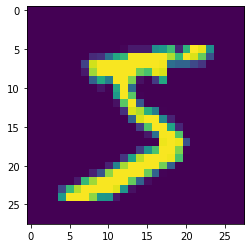

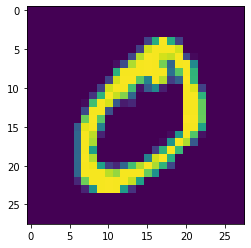

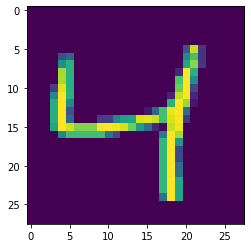

In [4]:
# Printing first 10 images in the training dataset 
for image in X_train[:3]:
  plt.figure()
  plt.imshow(image)
  plt.show()

In [5]:
# Seeing the first 5 elements of the training dataset
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

The DNN which we are going to make is having 5 layers, with 100 neurons each, He initialization and ELU activation function.

In [7]:
# Making the network architecture
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),  
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 5

In [8]:
# Seperating the dataset between 0-4 and 5-9 
train04_filter = np.isin(y_train, [0, 1, 2, 3, 4])
train59_filter = np.isin(y_train, [5, 6, 7, 8, 9])

test04_filter = np.isin(y_test, [0, 1, 2, 3, 4])
test59_filter = np.isin(y_test, [5, 6, 7, 8, 9])

In [9]:
# Splitting the data 
X_train04, y_train04, X_test04, y_test04 =  X_train[train04_filter], y_train[train04_filter], X_test[test04_filter], y_test[test04_filter]
X_train59, y_train59, X_test59, y_test59 =  X_train[train59_filter], y_train[train59_filter], X_test[test59_filter], y_test[test59_filter]


In [10]:
print(X_train.shape)
print(X_train04.shape)
print(X_train59.shape)

(60000, 28, 28)
(30596, 28, 28)
(29404, 28, 28)


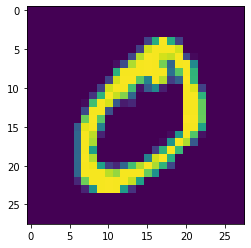

In [11]:
# Seeing a sample from each dataset 
plt.figure()
plt.imshow(X_train04[0])
plt.show()

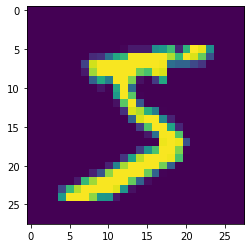

In [12]:
plt.figure()
plt.imshow(X_train59[0])
plt.show()

In [13]:
# Training the model 

# Making callbacks 
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

# Training the model 
history = model.fit(X_train04, y_train04, epochs=100,
                    validation_split=0.15, callbacks = [checkpoints_cb, early_stopping_cb])

Epoch 1/100
813/813 [==============================] - 4s 4ms/step - loss: 5.0551 - val_loss: 0.3620
Epoch 2/100
813/813 [==============================] - 3s 3ms/step - loss: 0.3343 - val_loss: 0.1584
Epoch 3/100
813/813 [==============================] - 3s 3ms/step - loss: 0.1829 - val_loss: 0.1481
Epoch 4/100
813/813 [==============================] - 3s 3ms/step - loss: 0.1113 - val_loss: 0.1415
Epoch 5/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0885 - val_loss: 0.1267
Epoch 6/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0863 - val_loss: 0.1083
Epoch 7/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0666 - val_loss: 0.0664
Epoch 8/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0685 - val_loss: 0.0782
Epoch 9/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0422 - val_loss: 0.0638
Epoch 10/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0433 - val_lo

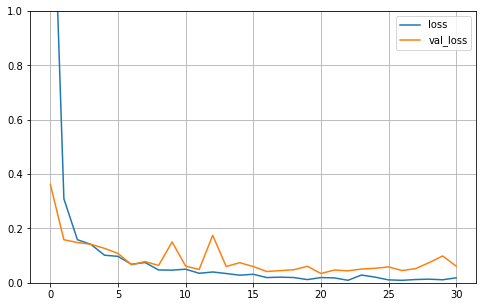

In [14]:
# Seeing learning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
# Evaluating the model 
model.evaluate(X_test04, y_test04)

161/161 [==============================] - 0s 1ms/step - loss: 0.0451


0.04511374607682228

In [16]:
# Adding batch normalization and repeating the process 

# Making the network architecture
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),
              keras.layers.BatchNormalization(),  
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [17]:
# Making callbacks 
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

# Training the model 
history = model.fit(X_train04, y_train04, epochs=100,
                    validation_split=0.15, callbacks = [checkpoints_cb, early_stopping_cb])

Epoch 1/100
813/813 [==============================] - 6s 5ms/step - loss: 0.2277 - val_loss: 0.1192
Epoch 2/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0781 - val_loss: 0.0821
Epoch 3/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0478 - val_loss: 0.1301
Epoch 4/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0366 - val_loss: 0.1470
Epoch 5/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0342 - val_loss: 0.1663
Epoch 6/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0343 - val_loss: 0.2013
Epoch 7/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0286 - val_loss: 0.1919
Epoch 8/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0265 - val_loss: 0.1090
Epoch 9/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0246 - val_loss: 0.1416
Epoch 10/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0177 - val_lo

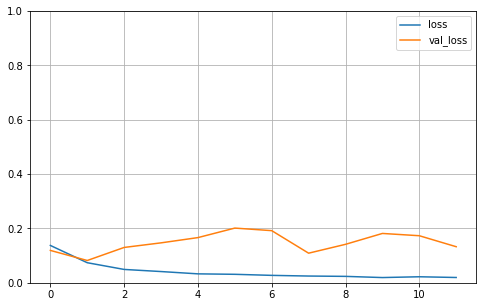

In [18]:
# Seeing learning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
# Evaluating model on test data 
model.evaluate(X_test04, y_test04)

161/161 [==============================] - 0s 2ms/step - loss: 0.6353


0.6353304982185364

The model has in turn performed worse than the previous iteration, it has most probably overfitted.

In [20]:
# Creating a new model with dropout before every layer

# Making the network architecture
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),
              keras.layers.Dropout(rate=0.2),  
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)              

In [21]:
# Making callbacks 
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

# Training the model 
history = model.fit(X_train04, y_train04, epochs=100,
                    validation_split=0.15, callbacks = [checkpoints_cb, early_stopping_cb])

Epoch 1/100
813/813 [==============================] - 4s 4ms/step - loss: 21.2944 - val_loss: 0.2690
Epoch 2/100
813/813 [==============================] - 3s 4ms/step - loss: 0.8081 - val_loss: 0.1699
Epoch 3/100
813/813 [==============================] - 3s 4ms/step - loss: 0.4301 - val_loss: 0.1377
Epoch 4/100
813/813 [==============================] - 3s 4ms/step - loss: 0.3447 - val_loss: 0.1108
Epoch 5/100
813/813 [==============================] - 3s 4ms/step - loss: 0.2679 - val_loss: 0.1137
Epoch 6/100
813/813 [==============================] - 3s 4ms/step - loss: 0.2426 - val_loss: 0.1016
Epoch 7/100
813/813 [==============================] - 3s 4ms/step - loss: 0.1960 - val_loss: 0.0919
Epoch 8/100
813/813 [==============================] - 3s 4ms/step - loss: 0.1895 - val_loss: 0.0742
Epoch 9/100
813/813 [==============================] - 3s 4ms/step - loss: 0.1738 - val_loss: 0.0677
Epoch 10/100
813/813 [==============================] - 3s 4ms/step - loss: 0.1481 - val_l

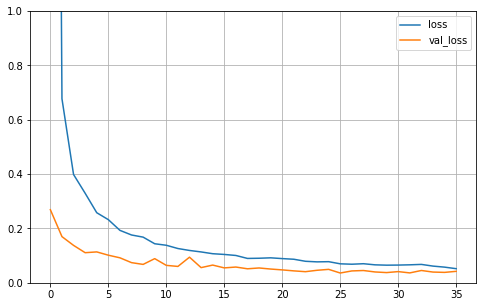

In [22]:
# Seeing learning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
# Evaluating the model 
model.evaluate(X_test04, y_test04)

161/161 [==============================] - 0s 1ms/step - loss: 0.0404


0.040377579629421234

#### Conclusion
Dropout turned out to be more efficient in improving the model's performance in this case as compared to batch normalization.

#### Create a new DNN reusing all the pretrained layers of the previous model, freeeze them, and replace the softmax output layer with a new one. Train this new DNN digits 5-9 and see the results.

In [24]:
# Loading the pretrained model
model_old = keras.models.load_model('my_model.h5')

# Copying pretrained layers
model_new = keras.models.Sequential(model_old.layers[:-1])
model_new.add(keras.layers.Dense(5, activation='softmax'))

# Cloning old model 
model_old_clone = keras.models.clone_model(model_old)
model_old_clone.set_weights(model_old.get_weights())

# Freezing the pretrained layers 
for layer in model_new.layers[:-1]:
  layer.trainable = False

# Compiling the new model and seeing its summary 
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)              

In [25]:
# Subtracting 5 from the y_train59 
y_train59 = y_train59 - 5

In [26]:
# Training the newly loaded model for classify digits 5-9

# Callbacks
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_new_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100)

# Training 
history = model_new.fit(X_train59, y_train59, epochs=100,
                        validation_split=0.15, callbacks=[checkpoints_cb, early_stopping_cb])

Epoch 1/100
782/782 [==============================] - 2s 3ms/step - loss: 6.0179 - val_loss: 1.2435
Epoch 2/100
782/782 [==============================] - 2s 2ms/step - loss: 1.4230 - val_loss: 1.2421
Epoch 3/100
782/782 [==============================] - 2s 2ms/step - loss: 1.3668 - val_loss: 1.2568
Epoch 4/100
782/782 [==============================] - 2s 2ms/step - loss: 1.3430 - val_loss: 1.2356
Epoch 5/100
782/782 [==============================] - 2s 2ms/step - loss: 1.3386 - val_loss: 1.2791
Epoch 6/100
782/782 [==============================] - 2s 2ms/step - loss: 1.3288 - val_loss: 1.2453
Epoch 7/100
782/782 [==============================] - 2s 2ms/step - loss: 1.3354 - val_loss: 1.2367
Epoch 8/100
782/782 [==============================] - 2s 2ms/step - loss: 1.3233 - val_loss: 1.2504
Epoch 9/100
782/782 [==============================] - 2s 2ms/step - loss: 1.3306 - val_loss: 1.2439
Epoch 10/100
782/782 [==============================] - 2s 2ms/step - loss: 1.3314 - val_lo

In [27]:
# Evaluating the model on test data 
y_test59 = y_test59 - 5

In [28]:
model_new.evaluate(X_test59, y_test59)

152/152 [==============================] - 0s 2ms/step - loss: 1.2703


1.270324468612671

#### Unfreezing the top two and continuing training 
Our model has dropout layers with dense layers, hence we will unfreeze the top 4 layers.

In [29]:
# Loading the pretrained model
model_old = keras.models.load_model('my_model.h5')

# Copying pretrained layers
model_new = keras.models.Sequential(model_old.layers[:-1])
model_new.add(keras.layers.Dense(5, activation='softmax'))

# Cloning old model 
model_old_clone = keras.models.clone_model(model_old)
model_old_clone.set_weights(model_old.get_weights())

# Freezing the pretrained layers 
for layer in model_new.layers[:8]:
  layer.trainable = False

# Compiling the new model and seeing its summary 
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')
model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)              

In [30]:
# Training the newly loaded model for classify digits 5-9

# Callbacks
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_new_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100)

# Training 
history = model_new.fit(X_train59, y_train59, epochs=100,
                        validation_split=0.15, callbacks=[checkpoints_cb, early_stopping_cb])

Epoch 1/100
782/782 [==============================] - 3s 3ms/step - loss: 3.1952 - val_loss: 1.1376
Epoch 2/100
782/782 [==============================] - 2s 3ms/step - loss: 1.2996 - val_loss: 1.1007
Epoch 3/100
782/782 [==============================] - 2s 3ms/step - loss: 1.2409 - val_loss: 1.0189
Epoch 4/100
782/782 [==============================] - 2s 3ms/step - loss: 1.2021 - val_loss: 1.0005
Epoch 5/100
782/782 [==============================] - 2s 3ms/step - loss: 1.1761 - val_loss: 0.9567
Epoch 6/100
782/782 [==============================] - 2s 3ms/step - loss: 1.1398 - val_loss: 0.9151
Epoch 7/100
782/782 [==============================] - 2s 3ms/step - loss: 1.1274 - val_loss: 0.9361
Epoch 8/100
782/782 [==============================] - 2s 3ms/step - loss: 1.1104 - val_loss: 0.9141
Epoch 9/100
782/782 [==============================] - 2s 3ms/step - loss: 1.1154 - val_loss: 0.8928
Epoch 10/100
782/782 [==============================] - 2s 3ms/step - loss: 1.1027 - val_lo

In [31]:
model_new.evaluate(X_test59, y_test59)

152/152 [==============================] - 0s 1ms/step - loss: 0.8448


0.8447552919387817

The performance of the model has significantly increased after unfreezing the top two layers.

#### Making a model which uses only 4 layers of the loaded model
Since, our model has dropout layers with dense layersm, we will omit the last two layers of the network.

In [39]:
# Loading the pretrained model
model_old = keras.models.load_model('my_model.h5')

# Cloning old model 
model_old_clone = keras.models.clone_model(model_old)
model_old_clone.set_weights(model_old.get_weights())

# Making the new model with just 8 hidden layers 
model_new = keras.models.Sequential()
for layer in model_old.layers[:9]:
  model_new.add(layer)

model_new.add(keras.layers.Dense(5, activation='softmax'))

# Freezing all layers 
for layer in model_new.layers[:-1]:
  layer.trainable = False

# Compiling the new model and seeing its summary 
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')
model_new.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)              

In [40]:
# Training the newly loaded model for classify digits 5-9

# Callbacks
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_new_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100)

# Training 
history = model_new.fit(X_train59, y_train59, epochs=100,
                        validation_split=0.15, callbacks=[checkpoints_cb, early_stopping_cb])

Epoch 1/100
782/782 [==============================] - 2s 3ms/step - loss: 16.8310 - val_loss: 1.7686
Epoch 2/100
782/782 [==============================] - 2s 3ms/step - loss: 3.1787 - val_loss: 1.2342
Epoch 3/100
782/782 [==============================] - 2s 2ms/step - loss: 1.8875 - val_loss: 1.1689
Epoch 4/100
782/782 [==============================] - 2s 2ms/step - loss: 1.5022 - val_loss: 1.2199
Epoch 5/100
782/782 [==============================] - 2s 2ms/step - loss: 1.4413 - val_loss: 1.1851
Epoch 6/100
782/782 [==============================] - 2s 2ms/step - loss: 1.4568 - val_loss: 1.1848
Epoch 7/100
782/782 [==============================] - 2s 2ms/step - loss: 1.4702 - val_loss: 1.1747
Epoch 8/100
782/782 [==============================] - 2s 2ms/step - loss: 1.4120 - val_loss: 1.1313
Epoch 9/100
782/782 [==============================] - 2s 2ms/step - loss: 1.4049 - val_loss: 1.3845
Epoch 10/100
782/782 [==============================] - 2s 3ms/step - loss: 1.4309 - val_l

On removing the top two layers, the model has performed slightly better than the model which used all the hidden layers after freezing them.